In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop

In [10]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [11]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [12]:
train_labels = train["label"] 
train.drop(["label"], axis = 1, inplace = True)
print(train.shape)

(42000, 784)


In [15]:
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [16]:
print(train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


Image label is:  5


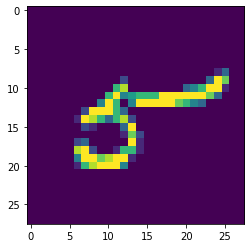

In [18]:
i = 1001
print("Image label is: ", train_labels[i])
plt.imshow(train[i][:,:,0])

In [19]:
train = train/255.0
train = train/255.0

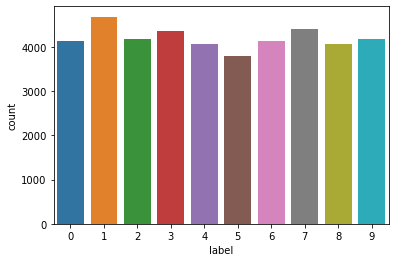

In [20]:
sns.countplot(train_labels)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size = 0.05, random_state = 1)

In [24]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28,28,1))
                            ,tf.keras.layers.MaxPooling2D(2,2)
                            ,tf.keras.layers.Conv2D(64, (3,3), activation = "relu")
                            ,tf.keras.layers.MaxPooling2D(2,2)
                            ,tf.keras.layers.Conv2D(64, (3,3), activation = "relu")
                            ,tf.keras.layers.MaxPooling2D(2,2)
                            ,tf.keras.layers.Flatten()
                            ,tf.keras.layers.Dense(150, activation = "relu")
                            ,tf.keras.layers.Dense(10, activation = "softmax")])

In [25]:
model.compile(optimizer = RMSprop(lr = 0.001), loss = "sparse_categorical_crossentropy",  metrics = ["accuracy"])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [27]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
1247/1247 [==============================] - 22s 17ms/step - loss: 1.7106 - accuracy: 0.3804 - val_loss: 0.7534 - val_accuracy: 0.7638
Epoch 2/20
1247/1247 [==============================] - 21s 17ms/step - loss: 0.5241 - accuracy: 0.8342 - val_loss: 0.4186 - val_accuracy: 0.8643
Epoch 3/20
1247/1247 [==============================] - 21s 17ms/step - loss: 0.3050 - accuracy: 0.9043 - val_loss: 0.2577 - val_accuracy: 0.9267
Epoch 4/20
1247/1247 [==============================] - 23s 18ms/step - loss: 0.2270 - accuracy: 0.9282 - val_loss: 0.2295 - val_accuracy: 0.9290
Epoch 5/20
1247/1247 [==============================] - 21s 17ms/step - loss: 0.1861 - accuracy: 0.9413 - val_loss: 0.1843 - val_accuracy: 0.9486
Epoch 6/20
1247/1247 [==============================] - 21s 17ms/step - loss: 0.1597 - accuracy: 0.9491 - val_loss: 0.1742 - val_accuracy: 0.9529
Epoch 7/20
1247/1247 [==============================] - 21s 17ms/step - loss: 0.1393 - accuracy: 0.9571 - val_loss: 0.1685 -

[]

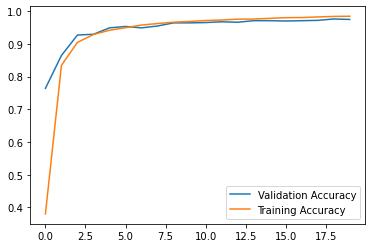

In [28]:
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.legend()
plt.plot()

Image label is:  0


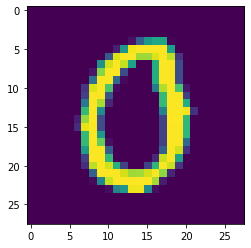

In [29]:
y_preds = np.argmax(model.predict(test), axis = 1)
# Checking the predictions on Test Data, Change the value of i to see different predictions  
i = 100
print("Image label is: ", y_preds[i])
plt.imshow(test[i][:,:,0])

In [30]:
sub.tail()

,ImageId,Label
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
27999,28000,0


In [32]:
submission = pd.DataFrame({"ImageId" : range(1, 28001), "Label" : y_preds})
submission.to_csv("submission.csv", index = False)

In [ ]:
print(submission)